In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [4]:
artists_billboard = pd.read_csv('artists_billboard_fix3.csv')
artists_billboard.shape
artists_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


In [5]:
artists_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

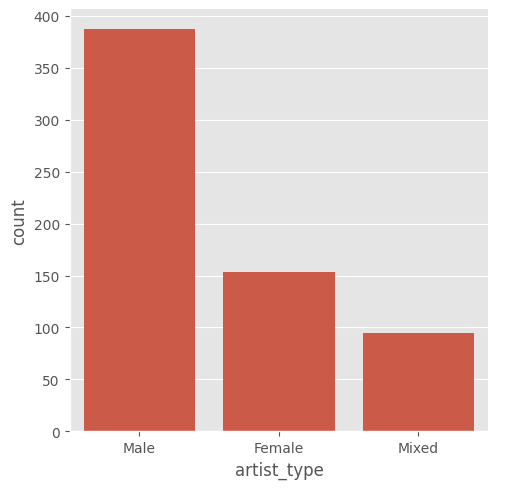

In [6]:
# ***factorplot has been deprecated and removed from Seaborn as of version 0.11.0.***
sb.catplot(x='artist_type', data=artists_billboard, kind="count")

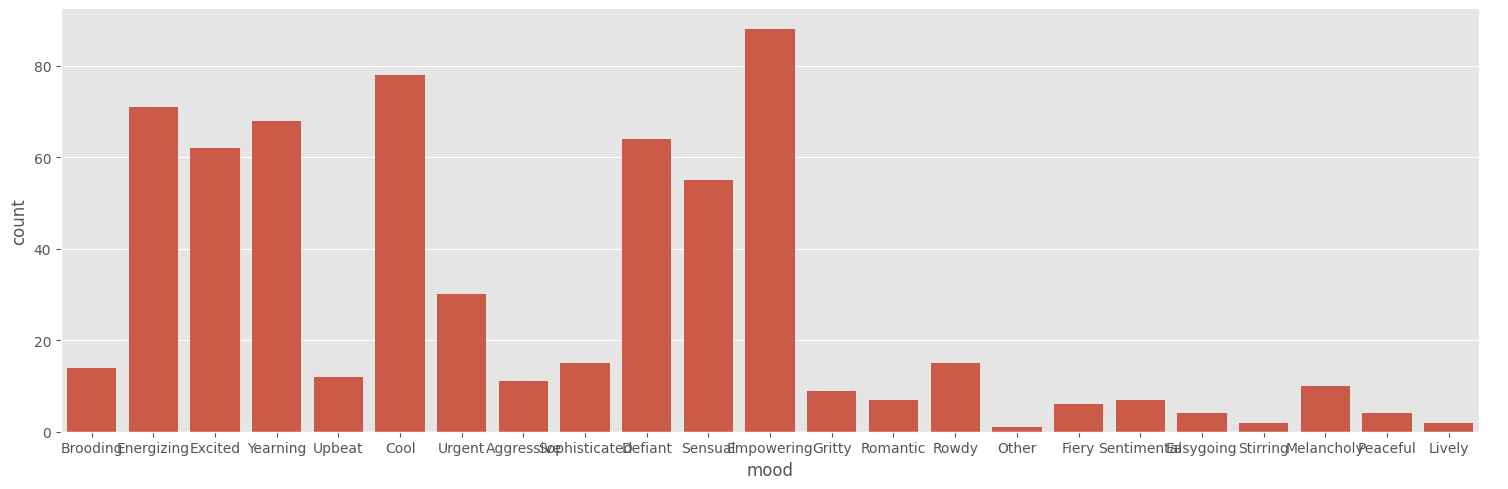

In [7]:
sb.catplot(x='mood',data=artists_billboard,kind="count", aspect=3)

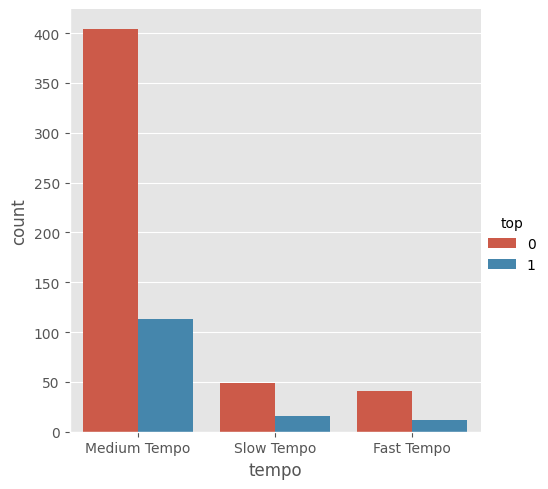

In [8]:
sb.catplot(x='tempo', data=artists_billboard, hue='top', kind="count")

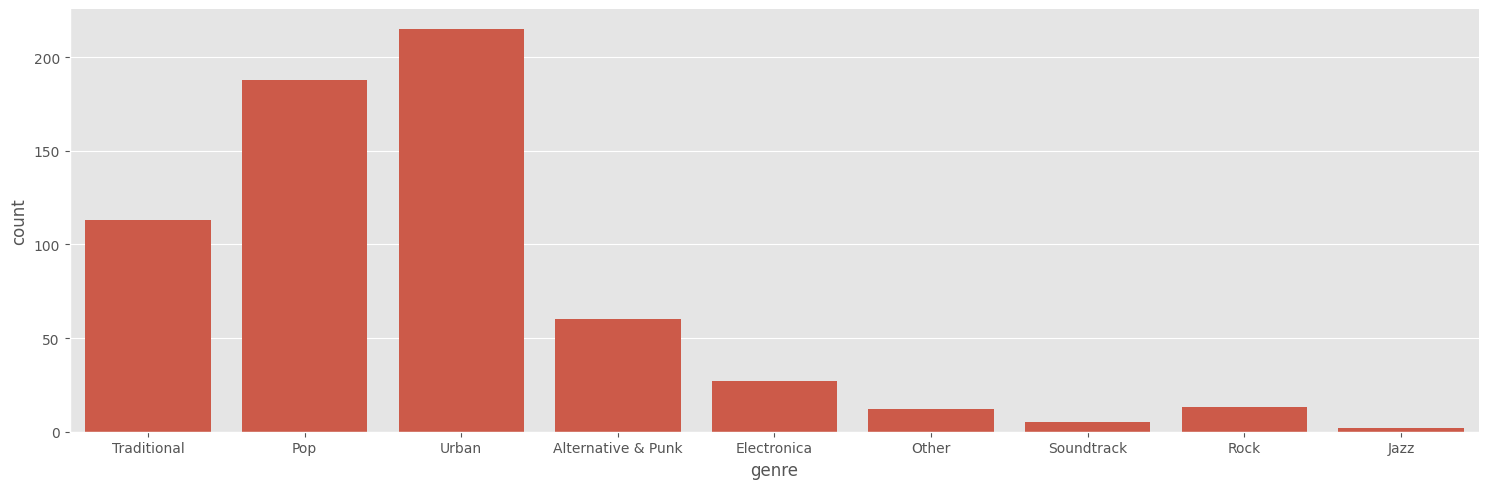

In [9]:
sb.catplot(x='genre', data=artists_billboard, kind="count", aspect=3)

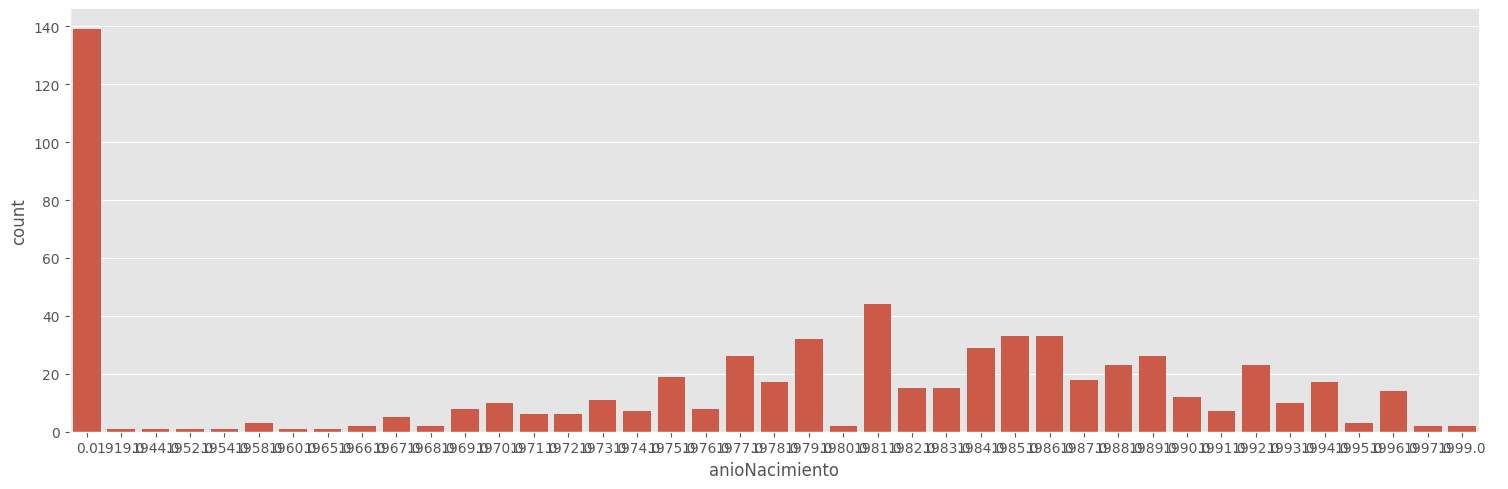

In [10]:
sb.catplot(x='anioNacimiento', data=artists_billboard, kind="count", aspect=3)

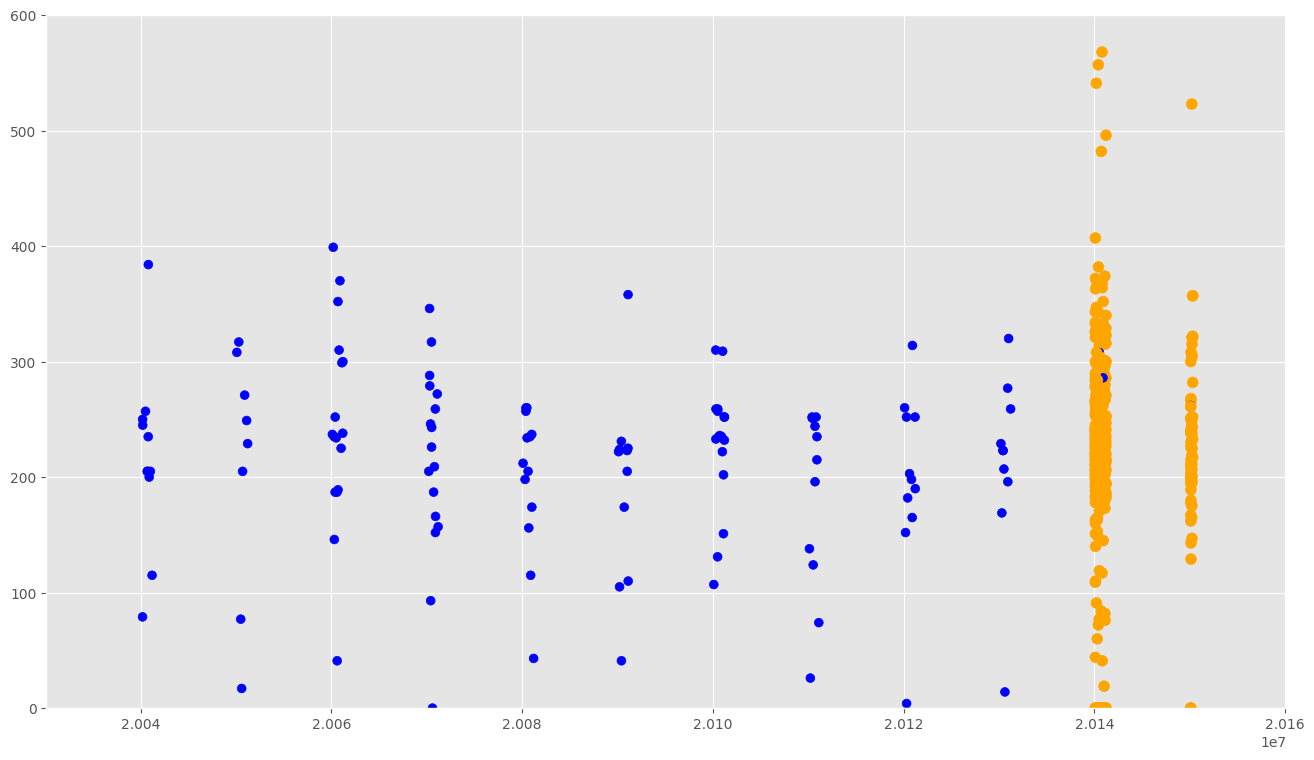

In [11]:
f1 = artists_billboard['chart_date'].values
f2 = artists_billboard['durationSeg'].values

colores = ['orange', 'blue']
tamanios = [60, 40]

asignar = []
asignar2 = []

for index, row in artists_billboard.iterrows():
    asignar.append(colores[row['top']])
    asignar2.append(tamanios[row['top']])

plt.scatter(f1, f2, c=asignar, s=asignar2)

plt.axis([20030101, 20160101, 0, 600])

plt.show()

In [12]:
def edad_fix(anio):
    if anio == 0:
        return None
    return anio

artists_billboard['anioNacimiento'] = artists_billboard.apply(lambda x: edad_fix(x['anioNacimiento']), axis=1)

In [13]:
def calcula_edad(anio, cuando):
    cad = str(cuando)
    momento = cad[:4]
    
    if anio == 0.0:
        return None
    
    return int(momento) - anio

artists_billboard['edad_en_billboard'] = artists_billboard.apply(lambda x:
                                         calcula_edad(x['anioNacimiento'], x['chart_date']), axis=1)

In [14]:
age_avg = artists_billboard['edad_en_billboard'].mean()
age_std = artists_billboard['edad_en_billboard'].std()
age_null_count = artists_billboard['edad_en_billboard'].isnull().sum()

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

conValoresNulos = np.isnan(artists_billboard['edad_en_billboard'])

artists_billboard.loc[np.isnan(artists_billboard['edad_en_billboard']), 'edad_en_billboard'] = age_null_random_list

artists_billboard['edad_en_billboard'] = artists_billboard['edad_en_billboard'].astype(int)

print("Edad Promedio: " + str(age_avg))
print("Desviación Estándar de Edad: " + str(age_std))
print("Intervalo para asignar edad aleatoria: " + str(int(age_avg - age_std)) + " a " + str(int(age_avg + age_std)))

Edad Promedio: 30.10282258064516
Desviación Estándar de Edad: 8.40078832861513
Intervalo para asignar edad aleatoria: 21 a 38


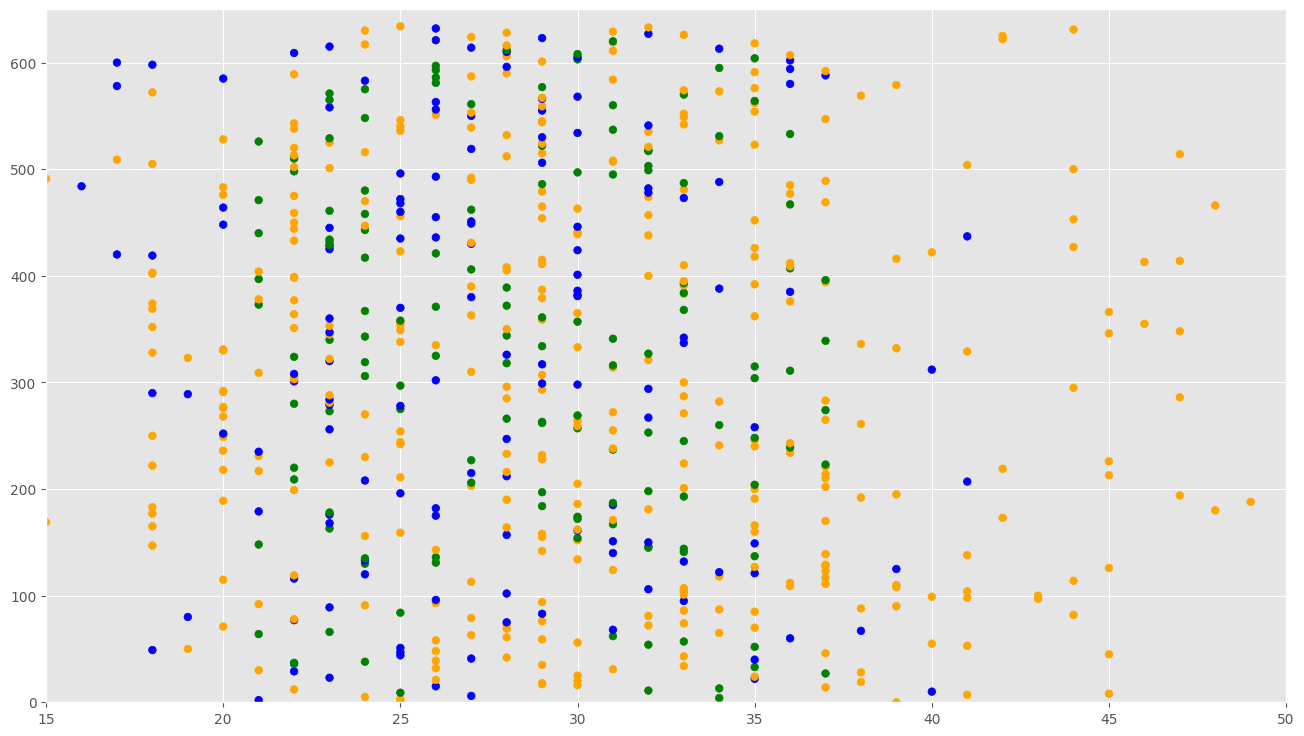

In [15]:
f1 = artists_billboard['edad_en_billboard'].values
f2 = artists_billboard.index

colores = ['orange', 'blue', 'green']

asignar = []

for index, row in artists_billboard.iterrows():
    if conValoresNulos[index]:
        asignar.append(colores[2])
    else:
        asignar.append(colores[row['top']])

plt.scatter(f1, f2, c=asignar, s=30)

plt.axis([15, 50, 0, 650])

plt.show()

In [16]:
# Mood Encoding
artists_billboard['moodEncoded'] = artists_billboard['mood'].map({
    'Energizing': 6,
    'Empowering': 6,
    'Cool': 5,
    'Yearning': 4,  # anhelo, deseo, ansia
    'Excited': 5,  # emocionado
    'Defiant': 3,
    'Sensual': 2,
    'Gritty': 3,  # coraje
    'Sophisticated': 4,
    'Aggressive': 4,  # provocativo
    'Fiery': 4,  # caracter fuerte
    'Urgent': 3,
    'Rowdy': 4,  # ruidoso alboroto
    'Sentimental': 4,
    'Easygoing': 1,  # sencillo
    'Melancholy': 4,
    'Romantic': 2,
    'Peaceful': 1,
    'Brooding': 4,  # melancólico
    'Upbeat': 5,  # optimista alegre
    'Stirring': 5,  # emocionante
    'Lively': 5,  # animado
    'Other': 0,
    '': 0
}).astype(int)

In [17]:
# Tempo Encoding
artists_billboard['tempoEncoded'] = artists_billboard['tempo'].map({
    'FastTempo': 0,
    'MediumTempo': 2,
    'SlowTempo': 1,
    '': 0
}).fillna(0).astype(int)


In [18]:
# Genre Encoding
artists_billboard['genreEncoded'] = artists_billboard['genre'].map({
    'Urban': 4,
    'Pop': 3,
    'Traditional': 2,
    'Alternative&Punk': 1,
    'Electronica': 1,
    'Rock': 1,
    'Soundtrack': 0,
    'Jazz': 0,
    'Other': 0,
    '': 0
}).fillna(0).astype(int)

In [19]:
# Artist Type Encoding
artists_billboard['artist_typeEncoded'] = artists_billboard['artist_type'].map({
    'Female': 2,
    'Male': 3,
    'Mixed': 1,
    '': 0
}).astype(int)

In [20]:
# Age Encoding based on the age when they arrived on the Billboard
artists_billboard.loc[artists_billboard['edad_en_billboard'] <= 21, 'edadEncoded'] = 0
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 21) & (artists_billboard['edad_en_billboard'] <= 26), 'edadEncoded'] = 1
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 26) & (artists_billboard['edad_en_billboard'] <= 30), 'edadEncoded'] = 2
artists_billboard.loc[(artists_billboard['edad_en_billboard'] > 30) & (artists_billboard['edad_en_billboard'] <= 40), 'edadEncoded'] = 3
artists_billboard.loc[artists_billboard['edad_en_billboard'] > 40, 'edadEncoded'] = 4

In [21]:
# Song Duration Encoding
artists_billboard.loc[artists_billboard['durationSeg'] <= 150, 'durationEncoded'] = 0
artists_billboard.loc[(artists_billboard['durationSeg'] > 150) & (artists_billboard['durationSeg'] <= 180), 'durationEncoded'] = 1
artists_billboard.loc[(artists_billboard['durationSeg'] > 180) & (artists_billboard['durationSeg'] <= 210), 'durationEncoded'] = 2
artists_billboard.loc[(artists_billboard['durationSeg'] > 210) & (artists_billboard['durationSeg'] <= 240), 'durationEncoded'] = 3
artists_billboard.loc[(artists_billboard['durationSeg'] > 240) & (artists_billboard['durationSeg'] <= 270), 'durationEncoded'] = 4
artists_billboard.loc[(artists_billboard['durationSeg'] > 270) & (artists_billboard['durationSeg'] <= 300), 'durationEncoded'] = 5
artists_billboard.loc[artists_billboard['durationSeg'] > 300, 'durationEncoded'] = 6

In [22]:
drop_elements = ['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type', 'chart_date', 'anioNacimiento', 'durationSeg', 'edad_en_billboard']

artists_encoded = artists_billboard.drop(drop_elements, axis=1)

In [23]:
# Group by 'moodEncoded' and aggregate 'top' with mean, count, and sum
artists_encoded[['moodEncoded', 'top']].groupby('moodEncoded', as_index=False).agg(
    mean=('top', 'mean'),
    count=('top', 'count'),
    sum=('top', 'sum')
)

,moodEncoded,mean,count,sum
0,0,0.000000,1,0
1,1,0.000000,8,0
2,2,0.274194,62,17
3,3,0.145631,103,15
4,4,0.136986,146,20
5,5,0.294872,156,46
6,6,0.270440,159,43


In [24]:
# Group by 'artist_typeEncoded' and aggregate 'top' with mean, count, and sum
artists_encoded[['artist_typeEncoded', 'top']].groupby('artist_typeEncoded', as_index=False).agg(
    mean=('top', 'mean'),
    count=('top', 'count'),
    sum=('top', 'sum')
)

,artist_typeEncoded,mean,count,sum
0,1,0.305263,95,29
1,2,0.320261,153,49
2,3,0.162791,387,63


In [25]:
# Group by 'genreEncoded' and aggregate 'top' with mean, count, and sum
artists_encoded[['genreEncoded', 'top']].groupby('genreEncoded', as_index=False).agg(
    mean=('top', 'mean'),
    count=('top', 'count'),
    sum=('top', 'sum')
)

,genreEncoded,mean,count,sum
0,0,0.088608,79,7
1,1,0.050000,40,2
2,2,0.008850,113,1
3,3,0.319149,188,60
4,4,0.330233,215,71


In [26]:
# Group by 'tempoEncoded' and aggregate 'top' with mean, count, and sum
artists_encoded[['tempoEncoded', 'top']].groupby('tempoEncoded', as_index=False).agg(
    mean=('top', 'mean'),
    count=('top', 'count'),
    sum=('top', 'sum')
)

,tempoEncoded,mean,count,sum
0,0,0.222047,635,141


In [27]:
# Group by 'edadEncoded' and aggregate 'top' with mean, count, and sum
artists_encoded[['edadEncoded', 'top']].groupby('edadEncoded', as_index=False).agg(
    mean=('top', 'mean'),
    count=('top', 'count'),
    sum=('top', 'sum')
)

,edadEncoded,mean,count,sum
0,0.0,0.253731,67,17
1,1.0,0.296296,162,48
2,2.0,0.255172,145,37
3,3.0,0.172897,214,37
4,4.0,0.042553,47,2


In [28]:
from sklearn.model_selection import KFold
from sklearn import tree
import pandas as pd

cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(artists_encoded))
depth_range = range(1, max_attributes + 1)

for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_split=20,
        min_samples_leaf=5,
        max_depth=depth,
        class_weight={1: 3.5}
    )
    
    for train_fold, valid_fold in cv.split(artists_encoded):
        f_train = artists_encoded.loc[train_fold]
        f_valid = artists_encoded.loc[valid_fold]

        model = tree_model.fit(X=f_train.drop(['top'], axis=1), y=f_train['top'])
        
        valid_acc = model.score(X=f_valid.drop(['top'], axis=1), y=f_valid['top'])
        fold_accuracy.append(valid_acc)
    
    avg = sum(fold_accuracy) / len(fold_accuracy)
    accuracies.append(avg)

df = pd.DataFrame({"MaxDepth": depth_range, "AverageAccuracy": accuracies})
df = df[["MaxDepth", "AverageAccuracy"]]
print(df.to_string(index=False))

 MaxDepth  AverageAccuracy
        1         0.556101
        2         0.556126
        3         0.564038
        4         0.639484
        5         0.618973
        6         0.639435
        7         0.650347


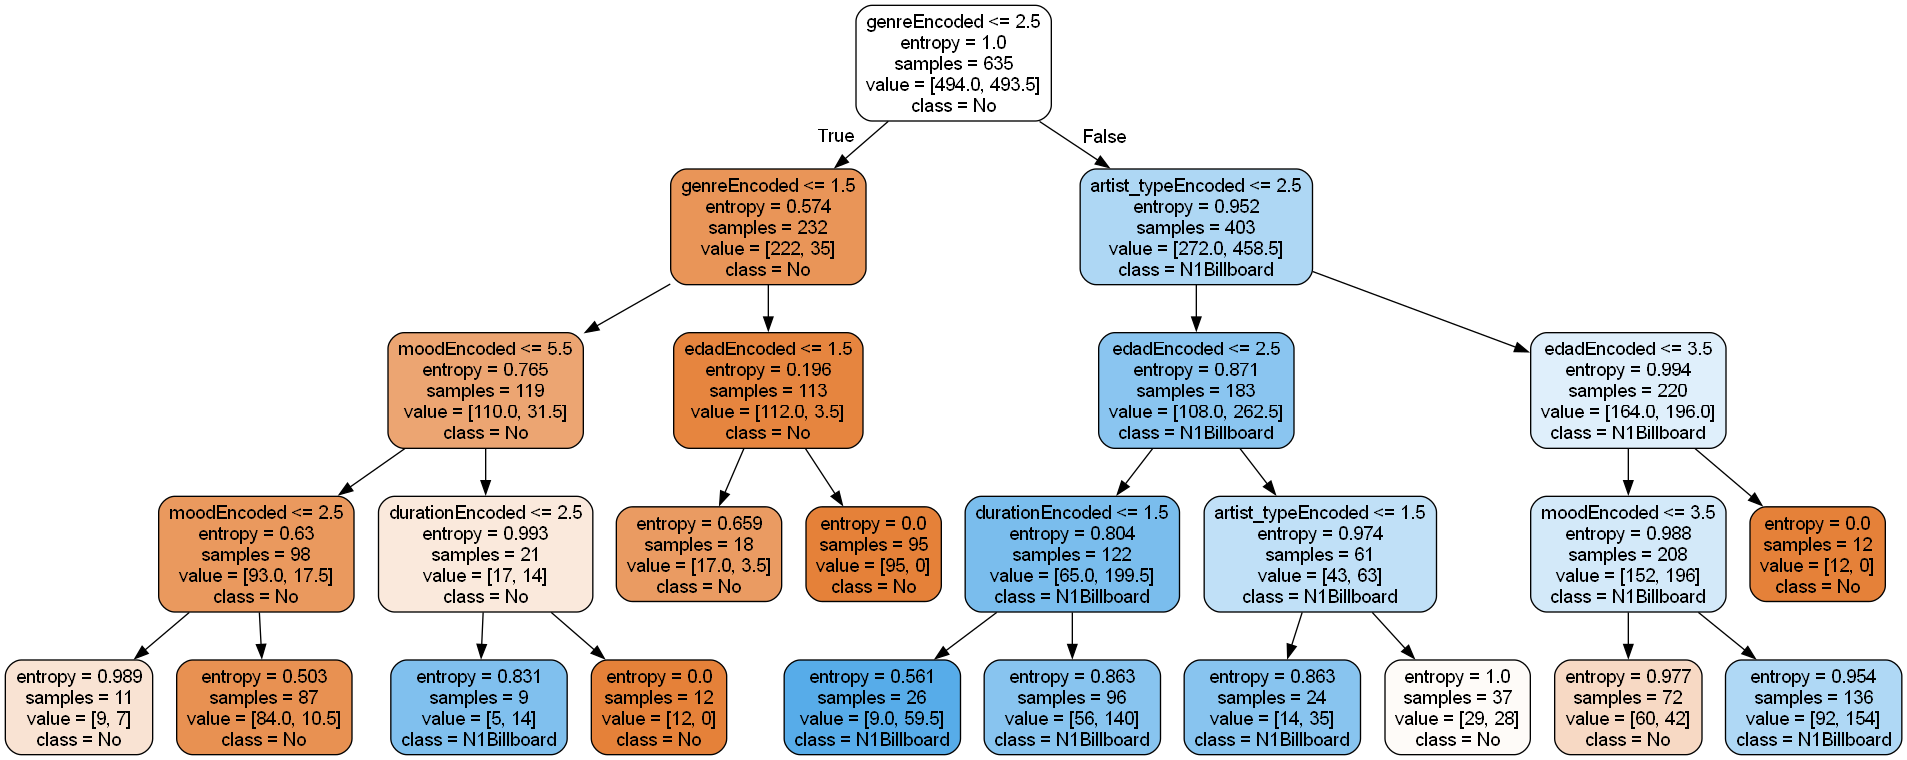

In [29]:
import graphviz

y_train = artists_encoded['top']
x_train = artists_encoded.drop(['top'], axis=1).values

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    min_samples_split=20,
    min_samples_leaf=5,
    max_depth=4,
    class_weight={1: 3.5}
)
decision_tree.fit(x_train, y_train)
dot_path = "tree1.dot"
with open(dot_path, 'w') as f:
    tree.export_graphviz(
        decision_tree,
        out_file=f,
        max_depth=7,
        impurity=True,
        feature_names=list(artists_encoded.drop(['top'], axis=1).columns),
        class_names=['No', 'N1Billboard'],
        rounded=True,
        filled=True
    )

with open(dot_path) as f:
    dot_data = f.read()

graph = graphviz.Source(dot_data)
graph.render("tree1", format="png", cleanup=True)
PImage("tree1.png")

In [30]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

68.19


In [31]:
x_test = pd.DataFrame(columns=('top', 'moodEncoded', 'tempoEncoded', 'genreEncoded',
                               'artist_typeEncoded', 'edadEncoded', 'durationEncoded'))

x_test.loc[0] = [1, 5, 2, 4, 1, 0, 3]

y_pred = decision_tree.predict(x_test.drop(['top'], axis=1))

print("Predicción: " + str(y_pred))

y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis=1))

print("Probabilidad de Acierto: " + str(round(y_proba[0][y_pred][0] * 100, 2)) + "%")

Predicción: [1]
Probabilidad de Acierto: 71.43%


c:\Users\artur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\artur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [32]:
x_test = pd.DataFrame(columns=('top', 'moodEncoded', 'tempoEncoded', 'genreEncoded', 
                               'artist_typeEncoded', 'edadEncoded', 'durationEncoded'))

x_test.loc[0] = [0, 4, 2, 1, 3, 2, 3]

y_pred = decision_tree.predict(x_test.drop(['top'], axis=1))

print("Predicción: " + str(y_pred))

y_proba = decision_tree.predict_proba(x_test.drop(['top'], axis=1))

probabilidad = y_proba[0][y_pred[0]]
print("Probabilidad de Acierto: " + str(round(probabilidad * 100, 2)) + "%")


Predicción: [0]
Probabilidad de Acierto: 88.89%


c:\Users\artur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\artur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
